<a href="https://colab.research.google.com/github/Kimjibeom/Python_Example/blob/main/%EB%B6%93%EA%BD%83(iris)_%ED%92%88%EC%A2%85_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코렙 버전 확인

In [2]:
import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)


Python 버전: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
pandas 버전: 1.1.5
matplotlib 버전: 3.2.2
NumPy 버전: 1.19.5
SciPy 버전: 1.4.1
IPython 버전: 5.5.0
scikit-learn 버전: 0.22.2.post1


첫 번째 애플리케이션: 붓꽃의 품종 분류

*   데이터, 특성(feature) : 독립변수, 꽃잎(petal), 꽃받침(sepal) 폭과 길이 cm
*   클래스(class), 레이블(label), 타깃(target) : 종속변수, 붓꽃의 품종(setosa,versicolor, vriginica)



데이터 적재
(https://archive.ics.uci.edu/ml/datasets/iris)


In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

데이터 확인하기

In [4]:
print("iris_dataset의 키:\n",iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(iris_dataset['DESCR'])  # 데이터셋에 대한 간략한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# 타깃의 이름 -> 품종 확인
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_dataset['target']  # 'setosa :0', 'versicolor: 1', 'virginnica:2 '

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 특성의 이름 확인
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_dataset['data'].shape # 데이터의 형태 확인

(150, 4)

In [ ]:
type(iris_dataset['data'])  # 데이터의 타입 확인

numpy.ndarray

In [ ]:
iris_dataset['target'].shape # 타겟의 형태 확인

(150,)

In [ ]:
type(iris_dataset['target']) # 타겟의 타입 확인

numpy.ndarray

성과 측정: 훈련 데이터와 테스트 데이터 분리

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size=0.25, random_state=777
)

훈련 데이터 확인하기

In [19]:
print('x_train 크기:', x_train.shape)
print('y_train 크기:', y_train.shape)

x_train 크기: (112, 4)
y_train 크기: (112,)


In [20]:
print('x_test 크기:', x_train.shape)
print('y_test 크기:', y_train.shape)

x_test 크기: (112, 4)
y_test 크기: (112,)


가장 먼저 할 일: 데이터 살펴보기

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# X_train 데이터를 사용해서 데이터프레임을 만들기 <- 데이터 시각화를 위해
# 열의 이름은 iris_dataset.feature_names에 있는 문자열 사용
iris_df = pd.DataFrame(x_train, columns=iris_dataset.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,2.4,3.3,1.0
1,4.6,3.4,1.4,0.3
2,4.4,3.2,1.3,0.2
3,6.3,2.7,4.9,1.8
4,5.5,2.6,4.4,1.2


아이리스 데이터 시각화

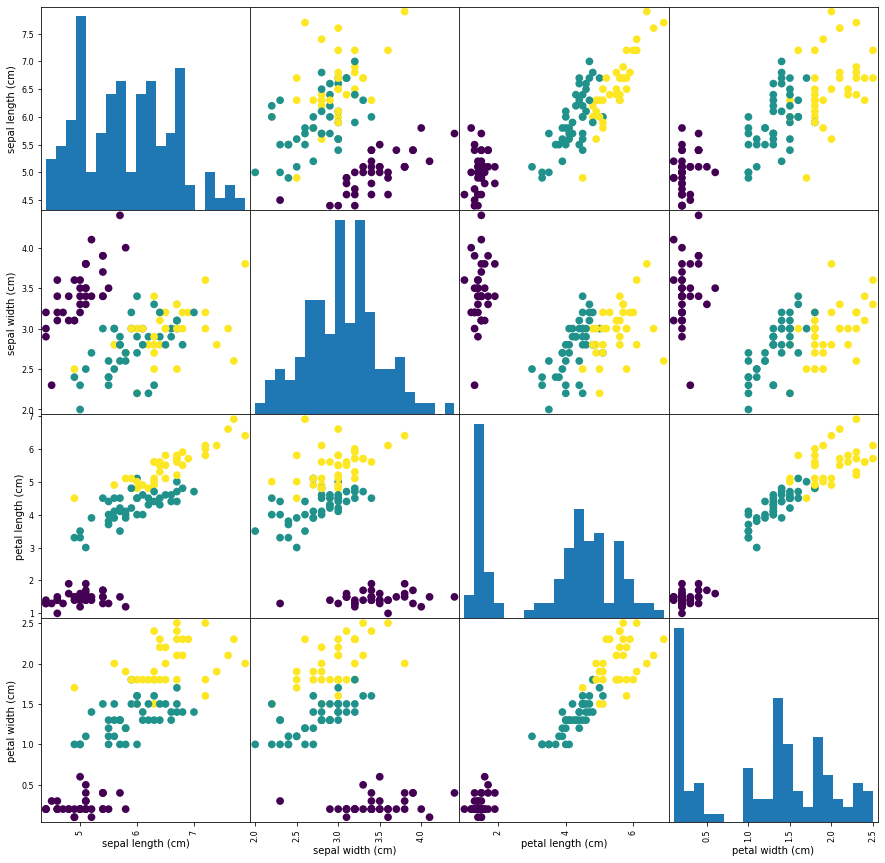

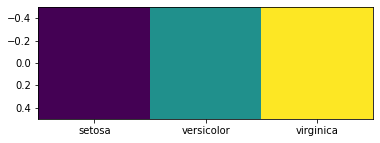

In [22]:
# 데이터프레임을 

pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15),
                           marker='o', hist_kwds={'bins':20}, s=60, alpha= 8)

plt.show()

plt.imshow([np.unique(y_train)])
_= plt.xticks(ticks=np.unique(y_train),labels=iris_dataset['target_names'])

첫 번째 머신 러닝 모델: k-최근접 이웃 알고리즘

k-최근접 이웃 알고리즘 이웃 설정

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # 이웃의 개수를 1개로 지정

학습하기

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

예측하기

In [25]:
x_new = np.array([[5, 2.9, 1, 0.2]])
print("x_new.shape:", x_new.shape)

x_new.shape: (1, 4)


In [26]:
prediction = knn.predict(x_new)
print("예측:", prediction)
print("예측한 타깃의 이름:",
      iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


모델 평가하기

In [30]:
y_pred = knn.predict(x_test)
print("테스트 세트에 대한 예측값:\n", y_pred)
print('테스트 세트의 정확도: {:.2f}'.format(np.mean(y_pred == y_test)))

테스트 세트에 대한 예측값:
 [2 0 2 2 1 0 2 2 0 0 2 1 1 2 2 2 0 2 0 1 1 1 2 0 2 0 2 0 2 2 0 2 0 2 1 0 0
 0]
테스트 세트의 정확도: 0.97


In [31]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(x_test, y_test)))

테스트 세트의 정확도: 0.97
